   ## ------- >--------- >----------PLAYSTORE ANALYSIS USING PYTHON-------- >----------- >--------- ##

# BY :

   # ARAVINTH.S

  # BE - COMP SCIENCE ENGINEERING

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ps = pd.read_csv("plst.csv")
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
ps.shape

(10841, 13)

In [19]:
ps.size

140933

In [47]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9355 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9355 non-null   object 
 1   Category        9355 non-null   object 
 2   Rating          9355 non-null   float64
 3   Reviews         9355 non-null   object 
 4   Size            9355 non-null   float64
 5   Installs        9355 non-null   int32  
 6   Type            9355 non-null   object 
 7   Price           9355 non-null   bool   
 8   Content Rating  9355 non-null   object 
 9   Genres          9355 non-null   object 
 10  Last Updated    9355 non-null   object 
 11  Current Ver     9351 non-null   object 
 12  Android Ver     9355 non-null   object 
dtypes: bool(1), float64(2), int32(1), object(9)
memory usage: 922.7+ KB


In [20]:
ps.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841.000000,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,NaN,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,NaN,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,NaN,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,21516.529524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,20746.537567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,8.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,5900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,18000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,26000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Task 1 : Data clean up – Missing value treatment

## a. Drop records where rating is missing since rating is our target/study variable

In [22]:
ps.dropna(subset = ['Rating'],axis = 0,how = 'any',inplace = True)
ps['Rating'].isnull().sum()

0

## b. Check the null values for the Android Ver column. 

## i. Are all 3 records having the same problem?

In [23]:
ps.loc[ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


YES all 3 record has same problem

## ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [24]:
ps.drop([10472],inplace = True)

In [25]:
ps.loc[ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


# iii. Replace remaining missing values with the mode

In [26]:
ps['Android Ver'].fillna(ps["Android Ver"].mode()[0],inplace = True)

# c. Current ver – replace with most common value

In [27]:
ps['Current Ver'].fillna(ps["Current Ver"].mode(),inplace = True)

# 2. Data clean up – correcting the data types

# a. Which all variables need to be brought to numeric types? 

Price and installs are need to brought to numeric type

# b. Price variable – remove $ sign and convert to float

In [28]:
ps['Price'] = ps['Price'].replace('[\$,]','',regex = True).astype(float)

# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [29]:
install = []

for i in ps['Installs']:
    install.append(i.replace(',','').replace('+','').strip())
    
ps['Installs'] = install
ps['Installs'] = ps['Installs'].astype(int)

# d. Convert all other identified columns to numeric

 All other columns are in numeric

# 3. Sanity checks – check for the following and handle accordingly


# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

# i. Are there any such records? Drop if so

In [30]:
ps.loc[ps.Rating < 1] & ps.loc[ps.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no such record found.

# b. Reviews should not be more than installs as only those who installed can review the app.

# i. Are there any such records? Drop if so.

In [31]:
temp = ps.loc[ps['Reviews'].astype(int) > ps['Installs'].astype(int)].index
temp

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

There are 7 rows where reviews more than installs.

In [32]:
ps.drop(temp,inplace = True)

In [33]:
ps.loc[ps['Reviews'].astype(int) > ps['Installs'].astype(int)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Now we deleted all the seven records.

# 4. Identify and handle outliers –

# a. Price column

# i. Make suitable plot to identify outliers in price

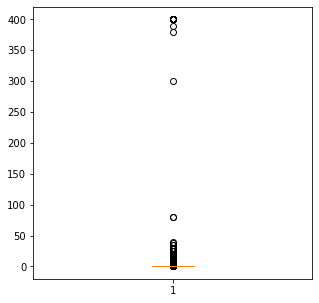

In [19]:
plt.figure(figsize = (5,5))
plt.boxplot(ps['Price'])
plt.show()

There are some outliers in price column

# ii. Do you expect apps on the play store to cost $200? Check out these cases

In [20]:
ps.loc[ps['Price'] == 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no app on the playstore to cost $200

# iii. After dropping the useless records, make the suitable plot again to identify outliers

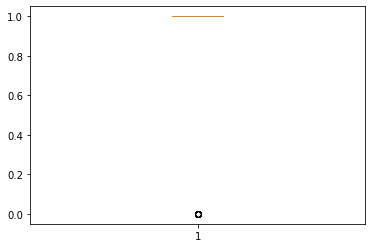

In [21]:
plt.boxplot(ps['Price'] <300)
plt.show()

# iv. Limit data to records with price < $30

In [34]:
ps["Price"] = ps['Price'] < 30

# b. Reviews column

# i. Make suitable plot

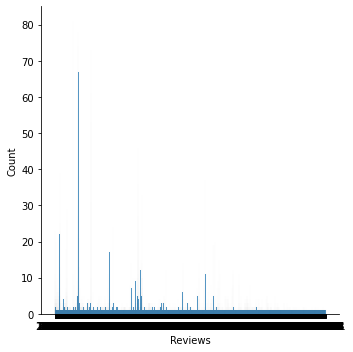

In [23]:
sns.displot(ps['Reviews'],bins = 30,kde = False)
plt.show()

# ii. Limit data to apps with < 1 Million reviews

In [24]:
lr = ps.loc[ps['Reviews'].astype(int) > 1000000].index
ps.drop(labels = lr,inplace = True )

In [25]:
lr.value_counts().sum()

704

# c. Installs

# i. What is the 95th percentile of the installs?

In [35]:
print("95 percentile of installs :",np.percentile(ps['Installs'],95))

95 percentile of installs : 100000000.0


In [36]:
percentile = ps.Installs.quantile(0.95) 
percentile

100000000.0

# ii. Drop records having a value more than the 95th percentile

In [37]:
ints = ps.loc[ps['Installs'].astype(int) > ps.Installs.quantile(0.95)].index
ints.value_counts().sum()

130

In [29]:
ps.drop(labels = ints , inplace = True)

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

# a. How do you explain this?

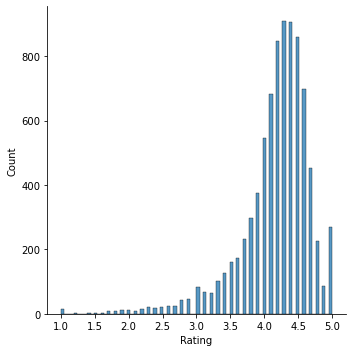

In [30]:
sns.displot(ps['Rating'])
plt.show()

In [31]:
print(ps["Rating"].skew())
print(ps['Rating'].mean())
print(ps['Rating'].median())

-1.7396480352327652
4.170186849574275
4.3


# b. What is the implication of this on your analysis?

In [32]:
ps['Rating'].mode()

0    4.3
dtype: float64

since MODE >= MEDIAN > MEAN,the distribution of rating is negatively skewed and more skewed towards lower values

# 6. What are the top Content Rating values?

# a. Are there any values with very few records?

In [38]:
ps['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

YES Adults only 18+ and unrated have very few records

# b. If yes, drop those as they won’t help in the analysis

In [39]:
cr = []
for i in ps['Content Rating']:
    cr.append(i.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

ps['Content Rating'] = cr

In [40]:
temp = ps[ps['Content Rating'] == 'NaN'].index
ps.drop(labels = temp , inplace = True)
ps['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

# a. Make a joinplot to understand the effect of size on rating

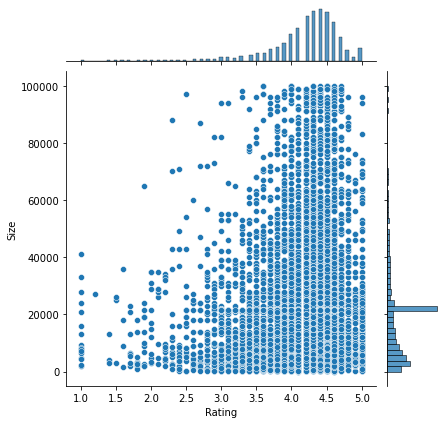

In [41]:
sns.jointplot(y = 'Size',x = 'Rating',data = ps,kind = 'scatter')
plt.show()

# b. Do you see any patterns?

In [ ]:
YES we see pattern between Rating and Size and they are correlated with each other. 

# c. How do you explain the pattern?

 Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size.Here we can see size of app increases when the rating of app increase so it is highly positively correlated.

# 8. Effect of price on rating

# a. Make a jointplot (with regression line)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


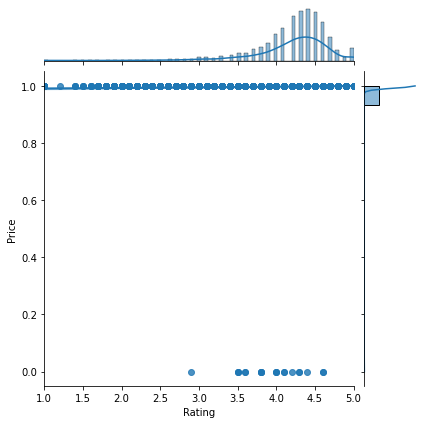

In [46]:
sns.jointplot(x = 'Rating',y = 'Price',data = ps,kind = 'reg')
plt.show()

# b. What pattern do you see?

Here increasing the price rating constantly stands above four.

# c. How do you explain the pattern?

Since increasing the price,rating almost constantly above the four so it has poor highly positively correlation between Price and Rating

In [53]:
ps.corr()

,Rating,Size,Installs,Price
Rating,1.000000,0.078886,0.051636,0.024622
Size,0.078886,1.000000,0.075375,0.014869
Installs,0.051636,0.075375,1.000000,0.009305
Price,0.024622,0.014869,0.009305,1.000000


# d. Replot the data, this time with only records with price > 0 

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


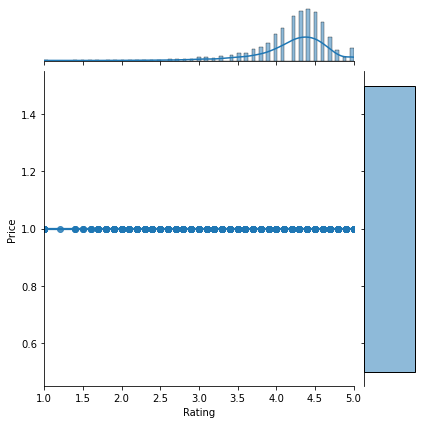

In [52]:
temp = ps.loc[ps["Price"] > 0]
sns.jointplot(x = 'Rating',y = 'Price',data = temp,kind = 'reg')
plt.show()

# e. Does the pattern change?

yes,there is slight changes in the pattern after removing 0 from records.

# f. What is your overall inference on the effect of price on the rating

Generally increasing in price does not have significant effect on rating,Here increasing in price increases the rating and it is almost constant after four.

# 9. Look at all the numeric interactions together –

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


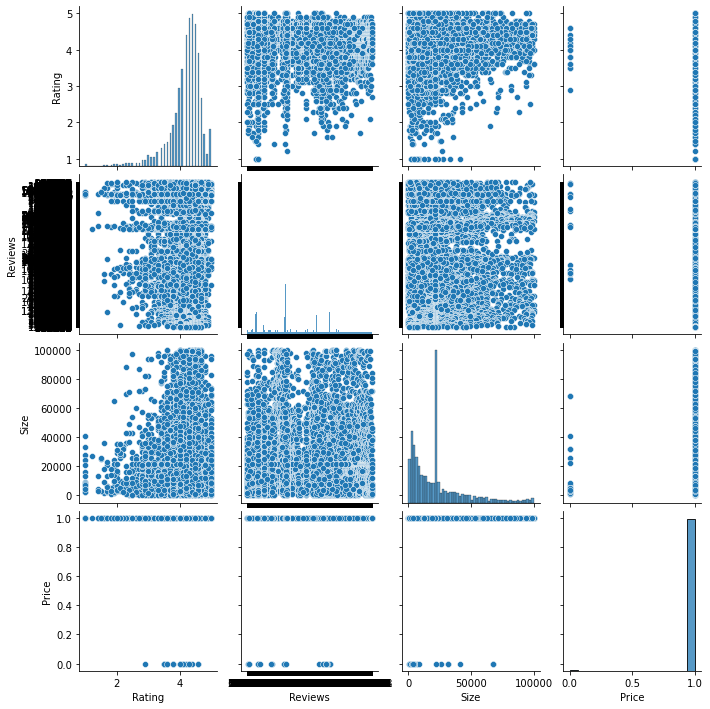

In [55]:
sns.pairplot(ps,vars = ['Rating','Reviews','Size','Price'])
plt.show()

# 10. Rating vs. content rating

# a. Make a bar plot displaying the rating for each content rating

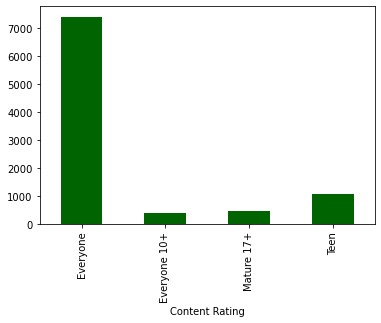

In [60]:
ps.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?

<function matplotlib.pyplot.show(close=None, block=None)>

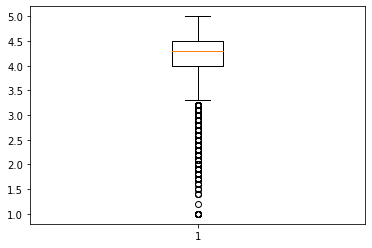

In [61]:
plt.boxplot(ps.Rating)
plt.show

we can there some outliers in rating so we can go for median because in case of outliers median is the best measure of central tendancy

# c. Choose the right metric and plot


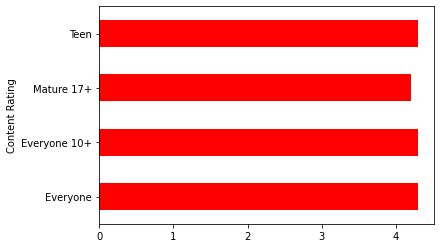

In [73]:
ps.groupby(['Content Rating'])['Rating'].median().plot.barh(color="red")
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

# a. Create 5 buckets (20% records in each) based on Size

In [93]:
bins =[0,20000,40000,60000,80000,100000]
ps['Bucket size'] = pd.cut(ps['Size'],bins,labels = ['0-20k','20-40k','40-60k','60-80k','80-100k'])
pd.pivot_table(ps,values = 'Rating',index = 'Bucket size',columns = 'Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket size,,,,
0-20k,4.148721,4.247561,4.015183,4.187047
20-40k,4.228845,4.197802,4.195109,4.237590
40-60k,4.192505,4.265957,4.202222,4.270896
60-80k,4.271774,4.374000,4.190909,4.291045
80-100k,4.280000,4.405556,4.252632,4.314815


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [94]:
temp = pd.pivot_table(ps,values = 'Rating',index = 'Bucket size',columns = 'Content Rating',aggfunc = lambda x : np.quantile(x,0.2))
temp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket size,,,,
0-20k,3.8,4.02,3.5,3.9
20-40k,4.0,4.00,4.0,4.0
40-60k,3.9,4.10,4.1,4.0
60-80k,4.0,4.20,4.0,4.0
80-100k,4.1,4.30,4.0,4.1


# c. Make a heatmap of this

# i. Annotated

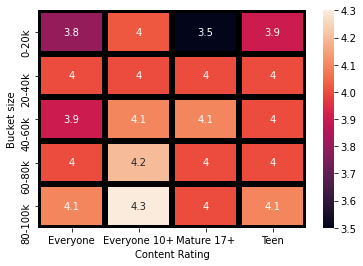

In [95]:
sns.heatmap(data = temp,annot = True,linewidths = 5,linecolor = 'black')
plt.show()

# ii. Greens color map

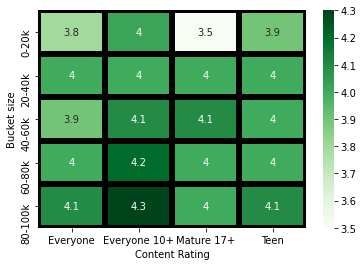

In [96]:
sns.heatmap(data = temp,annot = True,linewidths = 5,linecolor = 'black',cmap = 'Greens')
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis,we saw that lighter app are not preferred in all categories.App with size between 60k-80k and 80k-100k are highly rated  in  all categories so we can conclude heavier appa are preferred in all categories. 